Upload data to sqlite tables.

In [1]:
import pandas as pd
import numpy as np
from IPython import display as dis
import scipy.io.wavfile as wav
import tensorflow as tf
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import basic_rnn_seq2seq
from tensorflow.contrib.rnn import RNNCell, LSTMCell, MultiRNNCell
from scipy import signal 
from librosa import core
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
import time

%matplotlib inline

In [2]:
x_y = pd.read_pickle("dataset/x_y.pkl")
x_y = x_y.sample(frac=1)

In [3]:
time_step = 1000
hidden_layers = 1
batch_size = 1000
feature_count = 1
latent_dim = 61 
rate=8000
window_size=time_step

In [4]:
x_y

,sigs,emotion
file_name,,
Ses01F_script01_3_M019,"[[0.00908282], [0.00283858], [0.000783122], [0...",Excited
Ses01F_script01_3_F010,"[[-0.00232578], [-0.00357799], [-0.00077987], ...",Happiness
Ses01F_script01_2_F013,"[[0.037966], [0.0362112], [-0.00357923], [-0.0...",Excited
Ses01F_script01_1_F013,"[[0.000583267], [0.00202771], [0.00188047], [0...",Frustration
Ses01F_script01_1_F012,"[[-0.00579928], [-0.00313847], [-0.00399635], ...",Frustration
Ses01F_script01_3_M006,"[[-0.000596065], [0.00199818], [0.00219676], [...",Surprise
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise
Ses01F_script01_1_F026,"[[-0.00135279], [-0.00133179], [-0.000726668],...",Neutral state
Ses01F_script01_3_F017,"[[-0.023668], [-0.0436424], [-0.0384539], [-0....",Happiness


In [5]:
dis.Audio(data = x_y.iloc[-1,:].sigs.ravel(), rate = rate )

Signal [ 0.00105559  0.00139954  0.00106059 ..., -0.0012694  -0.00132868  0.        ]


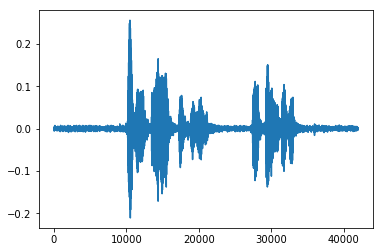

In [6]:
print("Signal",x_y.iloc[-1,:].sigs.ravel())
plt.plot(x_y.iloc[-1,:].sigs.ravel())

In [7]:
#x_y.loc[:,"sequence_length"] = None
#x_y.loc[:,"max"] = None

#time_step = max([sig.shape[0] for sig in x_y.sigs ])
print(time_step)

1000


In [8]:
#for index, row in x_y.iterrows():
#    sig = row.sigs
#    row.sequence_length = sig.shape[0]
#    row.max = max(abs(sig))
#    sig = sig / row.max
#    sig = np.concatenate((sig, np.zeros((time_step - row.sequence_length,1))))
#    #sig = np.pad(sig, (0, time_step - row.sequence_length), mode = "constant")
#    sig = np.reshape(sig, (1,-1, 1)) 
#    row.sigs = sig 

In [9]:
for index, row in x_y.iterrows():
    sig = row.sigs.ravel()
    sig = np.resize(sig, (len(sig) - len(sig)%window_size,))
    sig = sig.reshape((-1, window_size))
    row.sigs = sig 

In [10]:
x_y.loc[:,'file_num'] = np.arange(0,x_y.shape[0], 1)

x_y

,sigs,emotion,file_num
file_name,,,
Ses01F_script01_3_M019,"[[0.00908282, 0.00283858, 0.000783122, 0.00553...",Excited,0
Ses01F_script01_3_F010,"[[-0.00232578, -0.00357799, -0.00077987, -0.00...",Happiness,1
Ses01F_script01_2_F013,"[[0.037966, 0.0362112, -0.00357923, -0.0172903...",Excited,2
Ses01F_script01_1_F013,"[[0.000583267, 0.00202771, 0.00188047, 0.00090...",Frustration,3
Ses01F_script01_1_F012,"[[-0.00579928, -0.00313847, -0.00399635, -0.00...",Frustration,4
Ses01F_script01_3_M006,"[[-0.000596065, 0.00199818, 0.00219676, 0.0002...",Surprise,5
Ses01F_script01_1_F003,"[[0.00162135, 0.00178239, 0.000894559, 0.00118...",Surprise,6
Ses01F_script01_1_F026,"[[-0.00135279, -0.00133179, -0.000726668, 0.00...",Neutral state,7
Ses01F_script01_3_F017,"[[-0.023668, -0.0436424, -0.0384539, -0.036370...",Happiness,8


In [11]:
le = LabelEncoder()
x_y.emotion = le.fit_transform(x_y.emotion)
x_y

,sigs,emotion,file_num
file_name,,,
Ses01F_script01_3_M019,"[[0.00908282, 0.00283858, 0.000783122, 0.00553...",1,0
Ses01F_script01_3_F010,"[[-0.00232578, -0.00357799, -0.00077987, -0.00...",3,1
Ses01F_script01_2_F013,"[[0.037966, 0.0362112, -0.00357923, -0.0172903...",1,2
Ses01F_script01_1_F013,"[[0.000583267, 0.00202771, 0.00188047, 0.00090...",2,3
Ses01F_script01_1_F012,"[[-0.00579928, -0.00313847, -0.00399635, -0.00...",2,4
Ses01F_script01_3_M006,"[[-0.000596065, 0.00199818, 0.00219676, 0.0002...",6,5
Ses01F_script01_1_F003,"[[0.00162135, 0.00178239, 0.000894559, 0.00118...",6,6
Ses01F_script01_1_F026,"[[-0.00135279, -0.00133179, -0.000726668, 0.00...",4,7
Ses01F_script01_3_F017,"[[-0.023668, -0.0436424, -0.0384539, -0.036370...",3,8


In [12]:
sigs = None

for index, row in x_y.iterrows():
    sig = row.sigs
    #print(sig.shape)
    file_num = row.file_num
    file_num = np.repeat(file_num, sig.shape[0]).reshape(-1,1)
    emotion = np.repeat(row.emotion, sig.shape[0]).reshape(-1,1)
    
    seq = np.arange(0,sig.shape[0],1).reshape(-1,1)
    #print(file_num.shape)
    sig = np.concatenate((sig, emotion, file_num, seq), axis = 1)
    #print(sig[:,-2:])
    if(sigs is None):
        sigs = sig
    else:
        sigs = np.concatenate((sigs, sig))
    
np.random.shuffle(sigs)
print(sigs.shape)
print("Signal",sigs[-1], "Rate", rate, "Max time step:", time_step)


(1823, 1003)
Signal [  3.27344015e-02   2.06569070e-03  -3.55014838e-02 ...,   2.00000000e+00
   3.00000000e+00   5.00000000e+01] Rate 8000 Max time step: 1000


In [13]:
class Data(object):
    x = sigs[:,:-3][...,np.newaxis] + np.random.normal(scale=0.01, size = sigs[:,:-3][...,np.newaxis].shape)
    y_ = sigs[:,:-3][...,np.newaxis]
    f = sigs[:,-2]
    s = sigs[:,-1]
    e = sigs[:,-3]
    print(e)
    
    
   

[ 1.  1.  4. ...,  0.  1.  2.]


In [14]:
#["batch_size", "steps", "step_size", "feature_count"]
[batch_size, time_step, feature_count ]

[1000, 1000, 1]

In [15]:
class network(object):
    
    def __init__(self):
        pass
            
    def build_layers(self):
        
        tf.reset_default_graph()
        #learning_rate = tf.Variable(initial_value=0.001)

        global time_step 
        global batch_size 
        global hidden_layers
        global step_size
        global latent_dim
        
        with tf.variable_scope("Input"):
            self.x = tf.placeholder("float32", shape=[None, time_step, feature_count], name='x')
            self.y_ = tf.placeholder("float32", shape=[None, time_step, feature_count], name='y')
            self.keep_prob = tf.placeholder("float", name='kp')
            self.lr = tf.placeholder("float", name='lr')
            
        with tf.variable_scope("encoder"):
            enc_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #enc_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.state = enc_lstm.zero_state(batch_size, "float")
            print("State:",self.state)
            
            print("Audio Input:", self.x)
            self.enc_output, self.state = tf.nn.dynamic_rnn(enc_lstm, self.x, initial_state = self.state, parallel_iterations = 4)
            self.enc_state = self.state
            print("Encoder Output:",self.enc_output)

        with tf.variable_scope("decoder"):
            dec_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #dec_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.dec_output, self.state = tf.nn.dynamic_rnn(dec_lstm, self.enc_output, initial_state = self.state, parallel_iterations = 4)
            
            self.dec_output = tf.layers.dense(self.dec_output, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.output = tf.layers.dense(self.dec_output, units = 1, kernel_regularizer=tf.nn.l2_loss)
            print("Decoder Output:",self.dec_output)
            
        with tf.variable_scope("Optimize"):
            #loss = tf.contrib.seq2seq.sequence_loss(self.output, self.x, tf.ones(shape=[batch_size, time_step]))
            #self.loss = tf.losses.absolute_difference(tf.abs(self.y_), tf.abs(self.output))
            #self.loss = tf.reduce_sum(tf.abs(self.y_)) - tf.reduce_sum(tf.abs(self.output))
            #self.y__norm = tf.square(self.y_)
            #self.output_norm = tf.square(self.output) 
            self.loss = tf.losses.mean_squared_error(self.y_, self.output)
            #self.loss = tf.losses.huber_loss(self.y_, self.output)
            
            optimizer = tf.train.AdamOptimizer(self.lr)
            self.opti_op = optimizer.minimize(self.loss)
        print("Final Output:", self.output)

            
        

In [16]:
import collections

y_pred_list = []
final_state = None
Data.loss = []

class Train:    
    
    def train(net, epochs, lrs, x, y, f, s, e):
        global final_state
        
        with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            for lr in lrs:
                for epoch in range(1, epochs+1):
                    Data.out = pd.DataFrame(columns=['file_num', 'seq','x_out', 'y_out'])

                    Data.state_h = []
                    Data.state_c = []
                    
                    for i in range(0,x.shape[0],batch_size):
                        
                        x_train = x[i:i+batch_size,...]
                        y_train = y[i:i+batch_size,...]
                        f_train = f[i:i+batch_size]
                        s_train = s[i:i+batch_size]
                        e_train = e[i:i+batch_size]
                        if x_train.shape[0] < batch_size:
                            break;
                        net_output = sess.run(
                                            [net.opti_op, net.enc_state, 
                                             net.x, net.y_, 
                                             net.output, net.loss, 
                                             net.enc_output], #net.summary_op
                                              feed_dict={net.x: x_train, 
                                                         net.y_: y_train,
                                                         net.keep_prob:1,
                                                         net.lr:lr})
          
                        _, state, x_out, y_orig_out, y_out, loss, Data.enc = net_output    
                        print("Step {} lr {} Loss {}".format(epoch, lr, loss))
                        Data.loss.append(loss)
                    
                        for f_n, s_n, x_o, y_o, y_o_o, e_o, c_o, h_o in zip(f_train, s_train, x_out, y_out, y_orig_out, e_train, state.c, state.h):
                            t = pd.DataFrame({"file_num":f_n, "seq":s_n, "emotion":e_o,
                            "x_out":[x_o.ravel()],
                            "y_out":[y_o.ravel()],
                            "y_orig_out":[y_o_o.ravel()],
                            "state_c":[c_o],
                            "state_h":[h_o]
                                             
                                             })
                            Data.out = Data.out.append(t)

                        #Data.state_c.append(state.c)
                        #Data.state_h.append(state.h)
                        

In [17]:
import itertools

class Hyperparameters:
    def start_training():
        
        epochs = 100
        lrs = [1e-8]
        n = network()
        n.build_layers()
        
        Train.train(n, epochs, lrs, Data.x, Data.y_, Data.f, Data.s, Data.e)
            

In [18]:
Hyperparameters.start_training()

State: LSTMStateTuple(c=<tf.Tensor 'encoder/LSTMCellZeroState/zeros:0' shape=(1000, 61) dtype=float32>, h=<tf.Tensor 'encoder/LSTMCellZeroState/zeros_1:0' shape=(1000, 61) dtype=float32>)
Audio Input: Tensor("Input/x:0", shape=(?, 1000, 1), dtype=float32)
Encoder Output: Tensor("encoder/rnn/transpose:0", shape=(1000, 1000, 61), dtype=float32)
Decoder Output: Tensor("decoder/dense/BiasAdd:0", shape=(1000, 1000, 61), dtype=float32)
Final Output: Tensor("decoder/dense_2/BiasAdd:0", shape=(1000, 1000, 1), dtype=float32)
Step 1 lr 1e-08 Loss 0.009473102167248726
Step 2 lr 1e-08 Loss 0.009473099373281002
Step 3 lr 1e-08 Loss 0.009473097510635853
Step 4 lr 1e-08 Loss 0.009473094716668129
Step 5 lr 1e-08 Loss 0.00947309285402298
Step 6 lr 1e-08 Loss 0.009473091922700405
Step 7 lr 1e-08 Loss 0.009473089128732681
Step 8 lr 1e-08 Loss 0.009473087266087532
Step 9 lr 1e-08 Loss 0.009473083540797234
Step 10 lr 1e-08 Loss 0.009473081678152084
Step 11 lr 1e-08 Loss 0.009473079815506935
Step 12 lr 1e-0

In [19]:
#reconstruct X and Y
Data.out.set_index(keys=['file_num', 'seq'], inplace=True)
Data.out

,,emotion,state_c,state_h,x_out,y_orig_out,y_out
file_num,seq,,,,,,
27.0,65.0,1.0,"[-0.00220353, 0.00710633, 0.00166086, 0.006146...","[-0.00110009, 0.00354578, 0.000830481, 0.00308...","[0.00954971, 0.0237221, 0.0255158, 0.0143283, ...","[0.00837303, 0.00980462, 0.0135597, 0.0136921,...","[-0.00277697, -0.0022613, -0.00181355, -0.0013..."
2.0,7.0,1.0,"[0.00109923, -0.0131747, -0.00319984, -0.00612...","[0.000549695, -0.00659454, -0.00160004, -0.003...","[0.322555, 0.228494, 0.488445, 0.081309, 0.082...","[0.316562, 0.227995, 0.481923, 0.0875102, 0.08...","[0.00329407, 0.00092891, -0.00205265, -0.00281..."
29.0,7.0,4.0,"[0.00011251, 4.39102e-05, -0.000112067, -0.000...","[5.62567e-05, 2.19567e-05, -5.60379e-05, -0.00...","[-0.00543973, -0.0112598, -0.00201631, -0.0089...","[-0.00738532, -0.00610375, -0.00246364, -0.007...","[4.52563e-05, 9.13384e-05, 9.0698e-05, 9.93502..."
11.0,28.0,0.0,"[-0.000688761, -0.00368621, -0.00242828, -0.00...","[-0.000343745, -0.00184118, -0.00121541, -0.00...","[-0.0381346, 0.172228, 0.178571, 0.0041354, -0...","[-0.00562981, 0.168596, 0.164594, -0.00179519,...","[0.00184591, 0.000742785, -0.00057875, -0.0008..."
47.0,32.0,5.0,"[0.000391277, -0.000594934, 0.000104109, -0.00...","[0.000195698, -0.000297555, 5.20513e-05, -0.00...","[-0.00699262, -0.00617631, 0.0074053, 0.001651...","[-0.000901801, -9.55019e-05, 0.000622366, 0.00...","[0.000186558, 0.000178232, 0.000100217, 3.2085..."
30.0,21.0,4.0,"[-0.000167926, -0.000663633, -0.000481989, -0....","[-8.39165e-05, -0.000331697, -0.000241078, -6....","[0.00255252, 0.0100926, -0.0149561, 0.00115185...","[-0.0029209, -0.00233329, -0.00284007, -0.0039...","[0.000292133, 0.000179643, 0.00018916, 0.00016..."
20.0,35.0,5.0,"[0.000212772, 0.0018986, 0.00093845, 0.0006268...","[0.000106427, 0.000949407, 0.000469131, 0.0003...","[-0.0105943, -0.00150327, 0.0143415, -0.003582...","[0.00191381, 0.00468367, 0.00245477, 0.0007803...","[-0.000785151, -0.000597519, -0.00052708, -0.0..."
19.0,58.0,0.0,"[0.00146047, -0.0318198, -0.00895756, -0.01339...","[0.000729477, -0.0159318, -0.00448149, -0.0066...","[-0.068523, -0.0129778, 0.0292359, 0.0297384, ...","[-0.0726762, -0.0225537, 0.0234901, 0.0388244,...","[0.0120606, 0.00972625, 0.00738314, 0.00530375..."
39.0,20.0,0.0,"[-6.72931e-06, -0.000902952, -0.000487048, -0....","[-3.36291e-06, -0.000451329, -0.000243601, -0....","[-0.00489269, 0.00213153, -0.0165938, -0.00051...","[-0.00738699, -0.0102105, -0.00717529, -0.0070...","[0.000354985, 0.000282861, 0.000294348, 0.0002..."


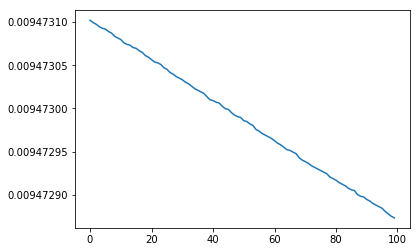

In [20]:
plt.plot(np.array(Data.loss))

In [21]:
#Data.out.x_out[0.0].sort_index()

In [22]:
np.concatenate(Data.out.x_out[0.0].sort_index().values).shape    

(24000,)

In [23]:
np.concatenate(Data.out.y_out[0.0].sort_index().values).shape    

(24000,)

In [24]:
#Data.output = np.array(Data.output)
#Data.state_h = np.concatenate(Data.state_h)
#Data.state_c = np.concatenate(Data.state_c)

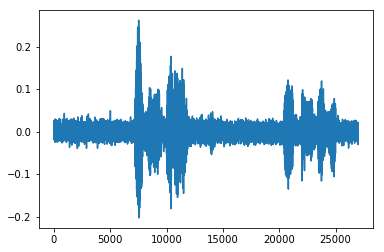

In [25]:
y = np.concatenate(Data.out.x_out[48].sort_index().values)
plt.plot(y)
dis.Audio(data = y, rate = rate)

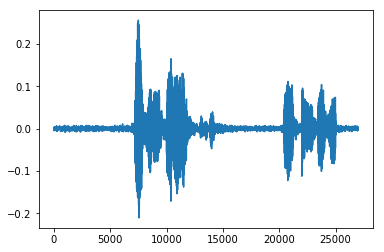

In [26]:
y = np.concatenate(Data.out.y_orig_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

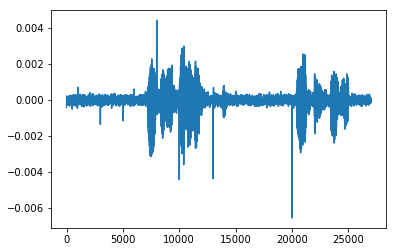

In [27]:
y = np.concatenate(Data.out.y_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

In [28]:

#Data.out.loc[:,'state_h'] = None
#Data.out.loc[:,'state_c'] = None

#for c, (index, row) in enumerate(x_y.iterrows()):
    #print(Data.state_c[c].shape)
    #print(Data.state_c[c].reshape((-1,1)).shape)
#    Data.out.state_h.loc[index, "state_h"] = Data.state_h[c].reshape((-1,1))
#    Data.out.state_c.loc[index, "state_c"] = Data.state_c[c].reshape((-1,1))
    
Data.out.loc[:,'emotion'] = le.inverse_transform(Data.out.emotion.values.astype("int"))
Data.out.to_pickle("dataset/x_y_sample_network_learned.pkl")
Data.out

,,emotion,state_c,state_h,x_out,y_orig_out,y_out
file_num,seq,,,,,,
27.0,65.0,Excited,"[-0.00220353, 0.00710633, 0.00166086, 0.006146...","[-0.00110009, 0.00354578, 0.000830481, 0.00308...","[0.00954971, 0.0237221, 0.0255158, 0.0143283, ...","[0.00837303, 0.00980462, 0.0135597, 0.0136921,...","[-0.00277697, -0.0022613, -0.00181355, -0.0013..."
2.0,7.0,Excited,"[0.00109923, -0.0131747, -0.00319984, -0.00612...","[0.000549695, -0.00659454, -0.00160004, -0.003...","[0.322555, 0.228494, 0.488445, 0.081309, 0.082...","[0.316562, 0.227995, 0.481923, 0.0875102, 0.08...","[0.00329407, 0.00092891, -0.00205265, -0.00281..."
29.0,7.0,Neutral state,"[0.00011251, 4.39102e-05, -0.000112067, -0.000...","[5.62567e-05, 2.19567e-05, -5.60379e-05, -0.00...","[-0.00543973, -0.0112598, -0.00201631, -0.0089...","[-0.00738532, -0.00610375, -0.00246364, -0.007...","[4.52563e-05, 9.13384e-05, 9.0698e-05, 9.93502..."
11.0,28.0,Anger,"[-0.000688761, -0.00368621, -0.00242828, -0.00...","[-0.000343745, -0.00184118, -0.00121541, -0.00...","[-0.0381346, 0.172228, 0.178571, 0.0041354, -0...","[-0.00562981, 0.168596, 0.164594, -0.00179519,...","[0.00184591, 0.000742785, -0.00057875, -0.0008..."
47.0,32.0,Sadness,"[0.000391277, -0.000594934, 0.000104109, -0.00...","[0.000195698, -0.000297555, 5.20513e-05, -0.00...","[-0.00699262, -0.00617631, 0.0074053, 0.001651...","[-0.000901801, -9.55019e-05, 0.000622366, 0.00...","[0.000186558, 0.000178232, 0.000100217, 3.2085..."
30.0,21.0,Neutral state,"[-0.000167926, -0.000663633, -0.000481989, -0....","[-8.39165e-05, -0.000331697, -0.000241078, -6....","[0.00255252, 0.0100926, -0.0149561, 0.00115185...","[-0.0029209, -0.00233329, -0.00284007, -0.0039...","[0.000292133, 0.000179643, 0.00018916, 0.00016..."
20.0,35.0,Sadness,"[0.000212772, 0.0018986, 0.00093845, 0.0006268...","[0.000106427, 0.000949407, 0.000469131, 0.0003...","[-0.0105943, -0.00150327, 0.0143415, -0.003582...","[0.00191381, 0.00468367, 0.00245477, 0.0007803...","[-0.000785151, -0.000597519, -0.00052708, -0.0..."
19.0,58.0,Anger,"[0.00146047, -0.0318198, -0.00895756, -0.01339...","[0.000729477, -0.0159318, -0.00448149, -0.0066...","[-0.068523, -0.0129778, 0.0292359, 0.0297384, ...","[-0.0726762, -0.0225537, 0.0234901, 0.0388244,...","[0.0120606, 0.00972625, 0.00738314, 0.00530375..."
39.0,20.0,Anger,"[-6.72931e-06, -0.000902952, -0.000487048, -0....","[-3.36291e-06, -0.000451329, -0.000243601, -0....","[-0.00489269, 0.00213153, -0.0165938, -0.00051...","[-0.00738699, -0.0102105, -0.00717529, -0.0070...","[0.000354985, 0.000282861, 0.000294348, 0.0002..."
